# `pyroomacoustics` demo for microphone directivities


 In this IPython notebook, we demonstrate how to add a microphone with directivities using pyroomacoustics:

In [1]:
import pyroomacoustics as pra
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython
from pyroomacoustics.directivities import DirectivityPattern, DirectionVector, CardioidFamily

# Creating a 3-D room

Build a room by specifying corners and height.

/Users/satvikdixit/Documents/GitHub/pyroomacoustics/pyroomacoustics/room.py:1412: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = a3.Axes3D(fig)


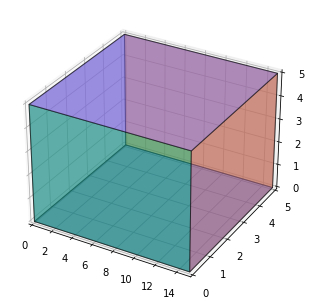

In [2]:
# create room
corners = np.array([[0,5],[15,5],[15,0],[0,0]]).T
room1 = pra.Room.from_corners(corners)
room1.extrude(5)

fig1, ax1 = room1.plot();

# Add source

Add source to the room. <br>
The speech file comes from the [CMU Arctic Database](http://www.festvox.org/cmu_arctic/).

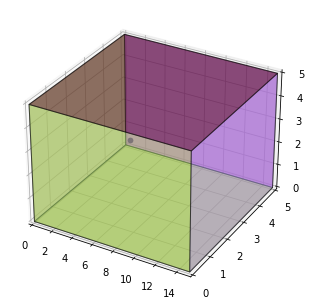

In [3]:
fs, signal = wavfile.read("arctic_a0001.wav")
room1.add_source([5,2.5,2.5], signal = signal)
fig1, ax1 = room1.plot()
ax1.set_xlim([0, 15])
ax1.set_ylim([0, 5])
ax1.set_zlim([0, 5]);

# Add microphone with directivity pointing away from the source


Specify the directivity pattern and orientation for the microphone and then add this microphone to the room.

In [4]:
PATTERN = DirectivityPattern.FIGURE_EIGHT
ORIENTATION = DirectionVector(azimuth=90, colatitude=0, degrees=True)
directivity1 = CardioidFamily(orientation=ORIENTATION, pattern_enum=PATTERN)

room1.add_microphone([10,2.5,2.5], directivity=directivity1);

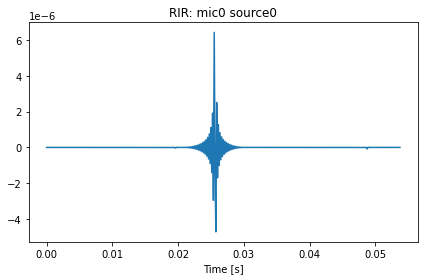

In [5]:
# plot
room1.plot_rir()
plt.show()

Lets listen to the output!


# Compare output signal to the original signal

In [6]:
# original signal
print("Original WAV:")
IPython.display.Audio(signal, rate=fs)

Original WAV:


In [7]:
room1.simulate()

In [8]:
# output signal for case 1
array_1 = room1.mic_array.signals[0,:]
print("Simulated propagation to mic with directivity pointing away from the source:")
IPython.display.Audio(room1.mic_array.signals[0,:], rate=fs)

Simulated propagation to mic with directivity pointing away from the source:


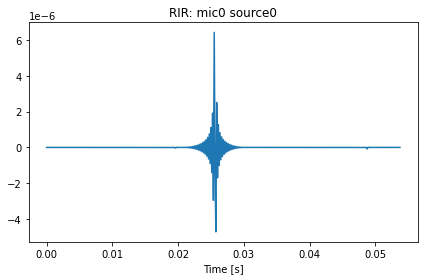

Simulated propagation to mic with directivity pointing towards the source:


In [9]:
# make room with the same dimensions
room2 = pra.Room.from_corners(corners)
room2.extrude(5)

# add source signal to the same point as before
room2.add_source([5,2.5,2.5], signal = signal)

# add microphone with directivity (pointing towards the source)
PATTERN = DirectivityPattern.FIGURE_EIGHT
ORIENTATION = DirectionVector(azimuth=0, colatitude=0, degrees=True)
directivity2 = CardioidFamily(orientation=ORIENTATION, pattern_enum=PATTERN)
room2.add_microphone([10,2.5,2.5], directivity=directivity2)

# plot
room2.plot_rir()
plt.show()

# output signal for case 2
room2.simulate()
array_2 = room2.mic_array.signals[0,:]
print("Simulated propagation to mic with directivity pointing towards the source:")
IPython.display.Audio(room2.mic_array.signals[0,:], rate=fs)


In [10]:
array_difference = array_2 - array_1
print(array_difference)

[0. 0. 0. ... 0. 0. 0.]


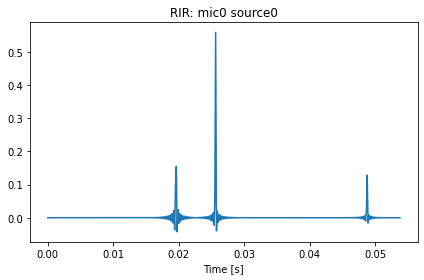

Simulated propagation to mic with no directivity:


In [11]:
# make room with the same dimensions
room3 = pra.Room.from_corners(corners)
room3.extrude(5)

# add source signal to the same point as before
room3.add_source([5,2.5,2.5], signal = signal)

# add microphone with no directivity 
room3.add_microphone([10,2.5,2.5], directivity= None)

# plot
room3.plot_rir()
plt.show()

# output signal for case 3
room3.simulate()
array_3 = room3.mic_array.signals[0,:]
print("Simulated propagation to mic with no directivity:")
IPython.display.Audio(room3.mic_array.signals[0,:], rate=fs)
